# Центральная предельная теорема своими руками

## Распределение Парето

Ссылка на страницу в википедии: https://en.wikipedia.org/wiki/Pareto_distribution

### Русская версия определения.

Пусть случайная величина X такова, что её распределение задаётся равенством:

$F_{X}(x) = P(X < x) = 1 - (\frac{ x_{m}}{x})^{k}, \forall x \geqslant x_{m}$

где $x_{m}, k > 0$. Тогда говорят, что X имеет распределние Парето с параметрами $x_{m}$ и $k$.

Плотность распределения Парето имеет вид:

$ f_X(x) =  \left\{\begin{matrix}
 \frac{kx_{m}^{k}}{x^{k+1}}, & x \geqslant x_{m} \\
 0, & x < x_{m}.
\end{matrix}\right.$

Формула для расчёта теоретического математического ожидания исходного распределения:

$\frac{kx_{m}}{k-1}$, если $k>1$.

Формула для расчёта дисперсии исходного распределения:

$(\frac{x_{m}}{k-1})^{2}\frac{k}{k-2}$, при $k>2$.

### Задача

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true)

### Решение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pareto

%matplotlib inline

Сгенерируем выборку объёма 1000 из распределения Парето (с $\alpha=3$):

In [2]:
b = 3 # alpha
scale = 1 # scale

sample = pareto.rvs(b = b, scale = scale, size=1000)

Теоретическая функция распределения:

$ 1 - (\frac{x_{m}}{x})^{k}$

Реализована в scipy.stats.genpareto функция cdf(x, c, loc=0, scale=1)

Эмпирическая функция распределения для полученной выборки:

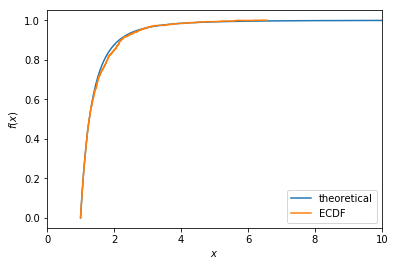

In [3]:
# График теоретической плотности
x = np.linspace(1,10,1000)
cdf = pareto.cdf(x, b = b, scale = scale)
plt.plot(x, cdf, label='theoretical')

# Для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

# Так как распределение имеет очень вытянутый по оси x график, зададим лимиты
plt.xlim(0, 10)

# Показываем график
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

plt.show()

## Задача

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

## Решение

Генерируем 1000 выборок со значением size = 5, 10, 50, 200.

In [4]:
# Функция, возвращающая lenght выборок запрошенным объёмом
def get_samples(lenght, size, b = b):
    # lenght - количество выборок
    # size - размер каждой выборки
    # c - коэффициент распределения Парето

    samples = []
    for x in range(lenght):
        sample = pareto.rvs(b = b, size = size, scale = scale)
        samples.append(sample)
    return samples

# Задаём значения размеров выборок
ns = [5, 25, 100, 250, 1000, 2500]

# Генерируем выборки
all_samples = []

for n in ns:
    samples = get_samples(1000, n, b)
    all_samples.append(samples)

# Если ядро не перезагрузилось, памяти хватило. Продолжаем ;-)

 Строим гистограммы выборочных средних.

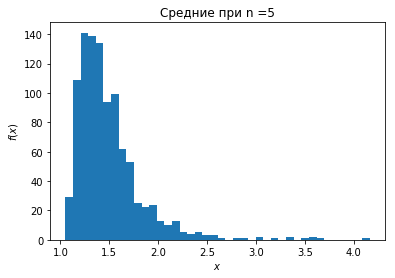

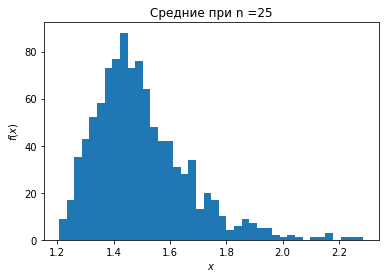

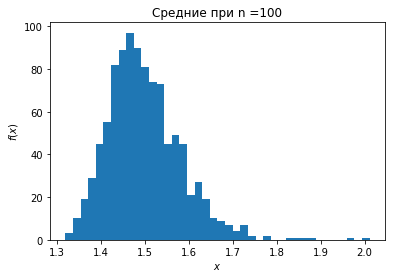

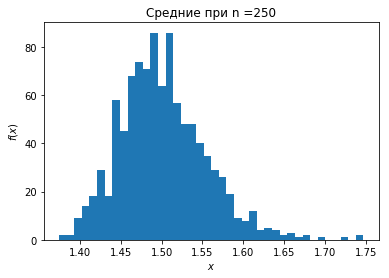

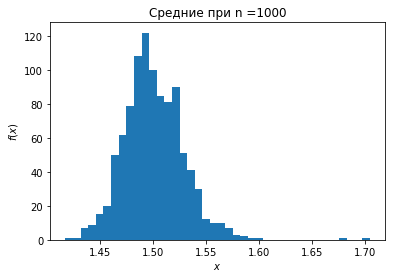

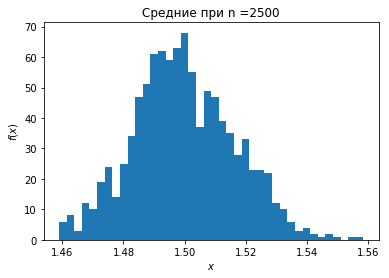

In [5]:
# Функция, возвращающая массив средних по выборкам
def get_medials(samples):
    medials = []
    for sample in samples:
        s = 0.
        for e in sample:
            s += e
        medial = s / len(sample)
        medials.append(medial)
    return medials

# Считаем средние по выборкам
all_medials = []
for samples in all_samples:
    medials = get_medials(samples)
    all_medials.append(medials)

# Функция, строящая предварительные гистограммы
def pre_show(medials, n):
    plt.hist(medials, bins=40)
    plt.title("Средние при n =" + str(n))
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.show()

for n, medials in enumerate(all_medials):
    pre_show(medials, ns[n])

## Задача

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.

Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

## Решение

Информация с английской версии описания распределения Парето.

Mean (математическое ожидание): $\frac{\alpha x_{m}}{\alpha - 1}$

Variance (дисперсия случайной величины): $ \frac{x_{m}^{2} \alpha}{(\alpha - 1)^{2}(\alpha - 2)} $

In [6]:
# Теоритическое математическое ожидание распределения Парето
teor_mean = (b * scale) / (b - 1)
teor_mean

1.5

In [7]:
# Теоритическая дисперсия распределения Парето
teor_variance = (scale ** 2 * b)/((b-1)**2 * (b-2))
teor_variance

0.75

In [8]:
# Дисперсия для выборок
variances = []

for n in ns:
    variance = teor_variance / n
    variances.append(variance)

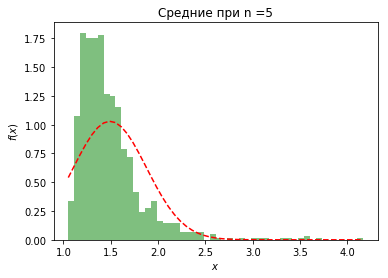

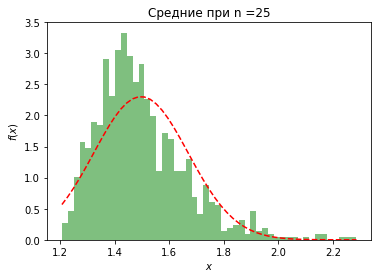

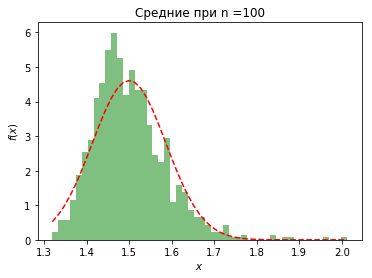

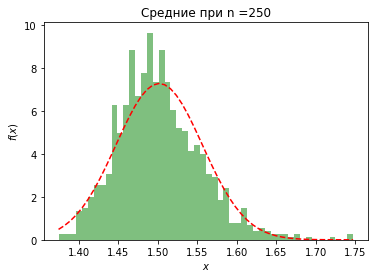

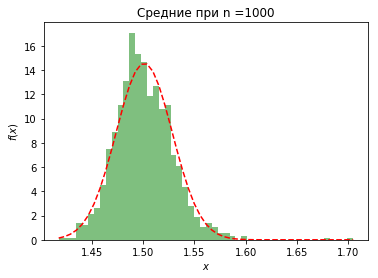

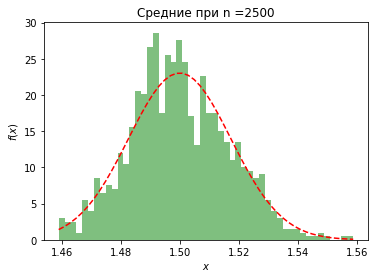

In [9]:
# Накладываем на гистограммы плотности соответствующего нормального распределения
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Функция считает среднее в массиве
def get_mean(xs):
    s = 0.
    for x in xs:
        s += x / len(xs)
    return s

# Функция строит график с гистограммой
def show(medials, variance, n):
    fig = plt.figure()
    num_bins = 50
    plt.title("Средние при n =" + str(n))
    n, bins, patches = plt.hist(medials, num_bins, normed=1, facecolor='green', alpha=0.5)

    # При необходимости, можно убедитсья, что среднее по выборкам равно теоритическому среднему
    y = mlab.normpdf(bins, get_mean(medials), math.sqrt(variance))
    plt.plot(bins, y, 'r--')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.subplots_adjust(left=0.15)
    plt.show()

for i, n in enumerate(ns):
    show(medials = all_medials[i], variance = variances[i], n = n)

## Задача

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Вывод

С увеличением объёмов выборки гистограмма приближается к теоритическому графику. На своём компьютере запускал при n = 1 000 000, визуально гистограмма заполнила теоретический график. Можно сделать вывод, что практика в очередной раз подтвердила теорию.

### Review criterialess
Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

Итого, на мой взгляд, всё есть ))